In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
data= pd.read_csv("Iris.csv")

In [39]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Exploratory Data Analysis

In [40]:
data.shape


(150, 6)

In [41]:
data.drop('Id',inplace=True,axis=1)

In [42]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [43]:
data.isnull().any()

SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

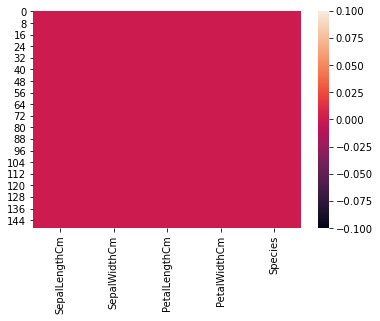

In [44]:
sns.heatmap(data.isnull())

In [45]:
data.Species.unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

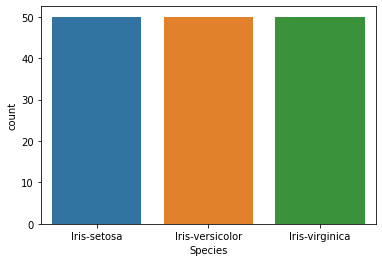

In [46]:
sns.countplot(data['Species'])

In [47]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

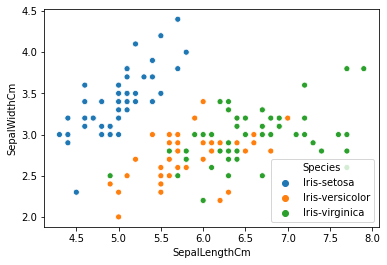

In [48]:
sns.scatterplot(data=data,x='SepalLengthCm',y='SepalWidthCm',hue="Species")

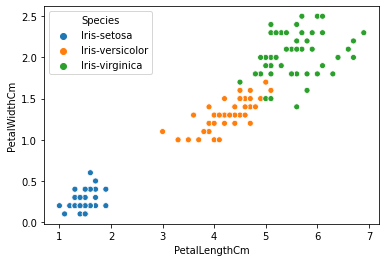

In [49]:
sns.scatterplot(data=data,x='PetalLengthCm',y='PetalWidthCm',hue="Species")

In [50]:
#Dropping first column
#data.drop('Id',axis=1,inplace=True)

In [51]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Correlation 

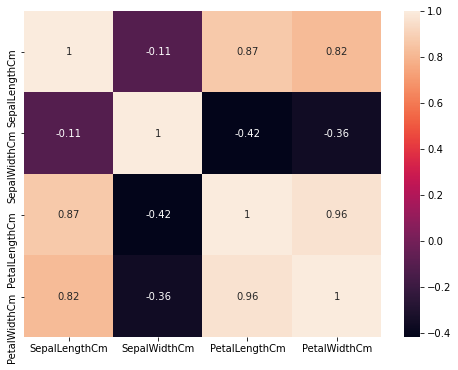

In [52]:
corrmat= data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corrmat,annot=True)

# Data Preprocessing

In [53]:
X= data.drop('Species',axis=1)


In [54]:
Y=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

**Model Training** 

In [69]:
#finding the optimum number of clusters using Elbow Method
from sklearn.cluster import KMeans
distortion=[]

for i in range (1,10):
    kmeansmodel= KMeans(n_clusters=i,random_state=0)
    kmeansmodel.fit(X)
    distortion.append(kmeansmodel.inertia_)






Text(0.5, 1.0, 'Chosing K value using elbow method')

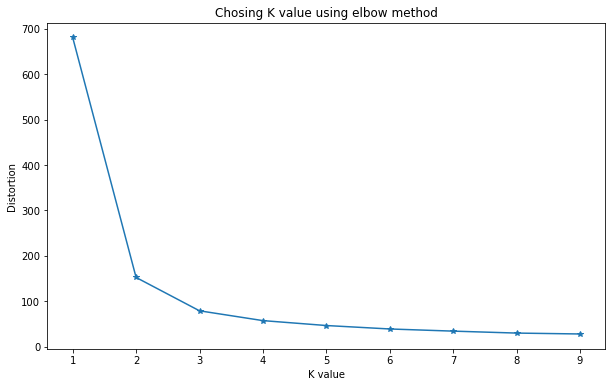

In [81]:
plt.figure(figsize=(10,6))

plt.plot(range(1,10),distortion,marker='*')
plt.xlabel("K value")
plt.ylabel("Distortion")
plt.title("Chosing K value using elbow method")

Clearly after K=3, the decrease in the sum squares within cluster can be observed

In [88]:
kmeanfinal = KMeans(n_clusters=3,random_state=0)
final=kmeanfinal.fit_predict(X)
final

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

# Visualising clusters

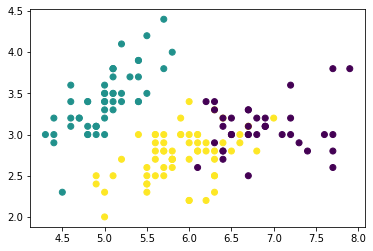

In [95]:
plt.scatter(X['SepalLengthCm'],X['SepalWidthCm'],c=final)

In [98]:
# Visualising the clusters
plt.scatter(X[final == 0, 0], X[final == 0, 1], 
             c = 'red', label = 'Iris-setosa')
plt.scatter(X[final == 1, 0], X[final == 1, 1], 
             c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[final == 2, 0], X[final == 2, 1],
             c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

TypeError: '(array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True, False,  True, False,  True,  True,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True, False]), 0)' is an invalid key